In [188]:
import pickle

with open('variables.pkl', 'rb') as f:
    df_13, df_21, df_20, df_4, df_5, df_6, df_7, df_11, df_16, df_12, df_17 = pickle.load(f)

In [67]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import normalize
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')

'es_ES.utf8'

In [46]:
# Ruta de carpeta para guardar los df en excel para posterior visualización
ruta_carpeta='./DF_DV'
#df.to_excel(ruta_carpeta + '/nombre_del_archivo.xlsx')

Numero de turistas por provincia año 2016-2022

In [47]:
df_20.head()

,Total,Tasa de variación anual,Andalucía,Tasa de variación anual,Aragón,Tasa de variación anual,"Asturias, Principado de",Tasa de variación anual,"Balears, Illes",Tasa de variación anual,...,"Navarra, Comunidad Foral de",Tasa de variación anual,País Vasco,Tasa de variación anual,"Rioja, La",Tasa de variación anual,Ceuta,Tasa de variación anual,Melilla,Tasa de variación anual
2022,71659281,129.82,10009890,135.62,385175,78.42,277267,71.72,13203885,108.77,...,273406,121.18,1545013,131.05,105910,121.05,35937,179,25224,..
2021,31180802,64.69,4248340,57.31,215884,25.45,161462,75.08,6324711,267.48,...,123614,-15.52,668683,26.82,47913,5.64,3942,..,8918,..
2020,18933103,-77.33,2700613,-77.54,172084,-68.41,92222,-70.99,1721123,-87.42,...,146325,-64.75,527286,-67.28,45355,-67.49,,,,
2019,83509153,0.85,12023153,2.93,544761,-0.14,317860,6.18,13679781,-1.24,...,415054,28.21,1611280,3.79,139497,-2.4,,,,
2018,82808413,1.15,11681256,1.42,545530,-2.99,299357,1.78,13851598,0.43,...,323730,-2.88,1552389,2.48,142926,15.09,,,,


In [48]:
df_20.to_excel(ruta_carpeta + '/N_turistas_provincia.xlsx')

Precio alquiler Euskadi

In [61]:
df_4.head()


,Precio m2,Variación mensual,Variación trimestral,Variación anual
Fecha,,,,
2023-02-01,12.8,"+ 0,1 %","+ 1,4 %","+ 5,4 %"
2023-01-01,12.8,"+ 0,6 %","+ 1,8 %","+ 5,1 %"
2022-12-01,12.8,"+ 0,8 %","+ 1,2 %","+ 4,5 %"
2022-11-01,12.7,"+ 0,5 %","+ 1,4 %","+ 2,1 %"
2022-10-01,12.6,"0,0 %","+ 1,6 %","+ 1,4 %"


In [103]:
media_anual_4 = df_4[['Precio m2']].resample('A').mean()
media_anual_4.index = media_anual_4.index.shift(1, freq='D')
media_anual_4['Precio m2 alquiler Euskadi'] = media_anual_4['Precio m2'] 
del media_anual_4['Precio m2']
media_anual_4.head()

,Precio m2 alquiler Euskadi
Fecha,
2012-01-01,11.030000
2013-01-01,10.791667
2014-01-01,9.950000
2015-01-01,9.775000
2016-01-01,9.775000


Precio compra Euskadi

In [82]:
df_5.head()

,Precio m2,Variación mensual,Variación trimestral,Variación anual
Fecha,,,,
2023-02-01,2803,"+ 0,6 %","+ 0,5 %","+ 4,1 %"
2023-01-01,2787,"+ 0,1 %","+ 0,1 %","+ 3,0 %"
2022-12-01,2783,"- 0,2 %","+ 1,2 %","+ 2,8 %"
2022-11-01,2788,"+ 0,1 %","+ 2,0 %","+ 3,6 %"
2022-10-01,2785,"+ 1,3 %","+ 2,0 %","+ 3,8 %"


In [101]:
media_anual_5 = df_5[['Precio m2']].resample('A').mean()
media_anual_5.index = media_anual_5.index.shift(1, freq='D')
media_anual_5['Precio m2 compra Euskadi'] = media_anual_5['Precio m2'] 
del media_anual_5['Precio m2']
media_anual_5.head()

,Precio m2 compra Euskadi
Fecha,
2012-01-01,3192.600000
2013-01-01,3023.416667
2014-01-01,2815.000000
2015-01-01,2655.166667
2016-01-01,2548.500000


Precio compra Madrid

In [76]:
df_6.head()

,Precio m2,Variación mensual,Variación trimestral,Variación anual
Fecha,,,,
2023-02-01,3995,"+ 1,7 %","+ 0,5 %","+ 6,1 %"
2023-01-01,3929,"- 0,3 %","- 1,1 %","+ 4,9 %"
2022-12-01,3939,"- 0,9 %","- 1,3 %","+ 6,5 %"
2022-11-01,3973,"0,0 %","0,0 %","+ 8,2 %"
2022-10-01,3974,"- 0,5 %","+ 1,9 %","+ 7,9 %"


In [104]:
media_anual_6 = df_6[['Precio m2']].resample('A').mean()
media_anual_6.index = media_anual_6.index.shift(1, freq='D')
media_anual_6['Precio m2 compra Madrid'] = media_anual_6['Precio m2'] 
del media_anual_6['Precio m2']
media_anual_6.head()

,Precio m2 compra Madrid
Fecha,
2012-01-01,3174.700000
2013-01-01,2925.166667
2014-01-01,2713.250000
2015-01-01,2665.000000
2016-01-01,2726.833333


Precio alquiler Madrid

In [75]:
df_7.head()

,Precio m2,Variación mensual,Variación trimestral,Variación anual
Fecha,,,,
2023-02-01,16.6,"+ 0,5 %","+ 2,5 %","+ 10,9 %"
2023-01-01,16.5,"+ 2,0 %","+ 1,3 %","+ 12,3 %"
2022-12-01,16.2,"0,0 %","- 0,8 %","+ 11,2 %"
2022-11-01,16.2,"- 0,7 %","+ 0,6 %","+ 10,7 %"
2022-10-01,16.3,"- 0,1 %","+ 2,6 %","+ 10,4 %"


In [105]:
media_anual_7 = df_7[['Precio m2']].resample('A').mean()
media_anual_7.index = media_anual_7.index.shift(1, freq='D')
media_anual_7['Precio m2 alquiler Madrid'] = media_anual_7['Precio m2'] 
del media_anual_7['Precio m2']
media_anual_7

,Precio m2 alquiler Madrid
Fecha,
2012-01-01,12.330000
2013-01-01,11.883333
2014-01-01,11.258333
2015-01-01,11.308333
2016-01-01,11.833333
2017-01-01,12.783333
2018-01-01,14.016667
2019-01-01,15.308333
2020-01-01,16.025000


In [106]:
df = pd.concat([media_anual_4, media_anual_5, media_anual_6, media_anual_7], axis=1)
df

,Precio m2 alquiler Euskadi,Precio m2 compra Euskadi,Precio m2 compra Madrid,Precio m2 alquiler Madrid
Fecha,,,,
2012-01-01,11.030000,3192.600000,3174.700000,12.330000
2013-01-01,10.791667,3023.416667,2925.166667,11.883333
2014-01-01,9.950000,2815.000000,2713.250000,11.258333
2015-01-01,9.775000,2655.166667,2665.000000,11.308333
2016-01-01,9.775000,2548.500000,2726.833333,11.833333
2017-01-01,9.983333,2522.250000,2804.666667,12.783333
2018-01-01,10.550000,2497.750000,2925.500000,14.016667
2019-01-01,11.133333,2507.500000,3466.083333,15.308333
2020-01-01,11.500000,2557.250000,3768.583333,16.025000


In [108]:
df.to_excel(ruta_carpeta + '/Precio_vivienda.xlsx')

Pernoctaciones y grados de ocupación en establecimientos hoteleros, categoría, día de la semana y periodo

In [189]:
df_11.head()

Año,Total,-Laborables,-Fin de semana
2011-01-01,120035,75258,44777
2011-02-01,140090,80002,60088
2011-03-01,177734,107670,70064
2011-04-01,218319,122848,95471
2011-05-01,207706,133278,74428


In [191]:
df_11 = df_11.drop(df_11.index[111])

In [193]:
#Fines de semana 2 dias y laborables 5
df_11['-Laborables'] = pd.to_numeric(df_11['-Laborables'])
df_11['Pernoctacion por dia laboral'] = df_11['-Laborables']/ 5
df_11['Pernoctacion por dia Finde'] = df_11['-Fin de semana'] / 2
df_11


Año,Total,-Laborables,-Fin de semana,Pernoctacion por dia laboral,Pernoctacion por dia Finde
2011-01-01,120035,75258,44777,15051.6,22388.5
2011-02-01,140090,80002,60088,16000.4,30044.0
2011-03-01,177734,107670,70064,21534.0,35032.0
2011-04-01,218319,122848,95471,24569.6,47735.5
2011-05-01,207706,133278,74428,26655.6,37214.0
...,...,...,...,...,...
2022-09-01,330304,212065,118239,42413.0,59119.5
2022-10-01,322320,200471,121849,40094.2,60924.5
2022-11-01,247036,150254,96782,30050.8,48391.0
2022-12-01,239673,144684,94989,28936.8,47494.5


In [194]:
df_11.to_excel(ruta_carpeta + '/Pernoctaciones por dias.xlsx')

Entradas, pernoctaciones, estancia media y grado de ocupación por plazas en los establecimientos hoteleros, alojamientos rurales y apartamentos turísticos de la C.A. de Euskadi por variable, territorio histórico y periodo

In [195]:
df_16.head()

nan,Entradas,NaN,NaN,NaN,Pernoctaciones,NaN,NaN,NaN,Estancia media,NaN,NaN,NaN
2016-01,148816,22388,66201,60228,273764,43604,121233,108928,1.84,1.95,1.83,1.81
2016-02,171511,22996,82009,66506,310728,45966,148425,116337,1.81,2,1.81,1.75
2016-03,223501,31487,103151,88863,438115,64116,196669,177330,1.96,2.04,1.91,2
2016-04,236863,30551,113251,93061,433356,55280,206875,171200,1.83,1.81,1.83,1.84
2016-05,279835,37329,126187,116319,542821,70860,247965,223996,1.94,1.9,1.97,1.93


In [198]:
df_16.to_excel(ruta_carpeta + '/Entradas pernoctaciones y estacia media por periodo.xlsx')

Evolucion del paro por sectores

In [207]:
df_12.head()

,AGRICULTURA,INDUSTRIA,CONSTRUCCIÓN,SERVICIOS
Unnamed: 1,,,,
2014-01-01,208174.0,512531.0,649211.0,3071282.0
2014-02-01,216083.0,507583.0,643061.0,3067530.0
2014-03-01,230937.0,502018.0,629169.0,3046322.0
2014-04-01,224699.0,493736.0,617966.0,2961616.0
2014-05-01,215807.0,479471.0,593772.0,2896348.0


la variabilidad se puede medir mediante la desviación estándar o la varianza de los valores de empleo en cada sector. Los sectores con una desviación estándar o una varianza más baja tendrán una evolución del empleo más estable.
Calculamos la desviación estándar de los valores de empleo en cada sector y ordena los sectores de manera ascendente según su desviación estándar. Los sectores con una desviación estándar más baja tendrán una evolución del empleo más estable.

In [199]:
# Calcular la desviación estándar de los valores de empleo en cada sector
std_dev = df_12.std(axis=0)

# Ordenar los sectores de manera ascendente según su desviación estándar
std_dev_sorted = std_dev.sort_values(ascending=True)

# Mostrar los resultados
print(std_dev_sorted)

AGRICULTURA      28558.750631
INDUSTRIA        72749.133267
CONSTRUCCIÓN    112293.242110
SERVICIOS       286930.371478
dtype: float64


In [205]:
df_desv = pd.DataFrame(std_dev_sorted, columns=['Desviacion'])
df_desv

,Desviacion
AGRICULTURA,28558.750631
INDUSTRIA,72749.133267
CONSTRUCCIÓN,112293.242110
SERVICIOS,286930.371478


In [ ]:
df_desv.to_excel(ruta_carpeta + '/Desviacion estandar empleo por sector.xlsx')
df_12.to_excel(ruta_carpeta + '/Evolucion del paro por secotres.xlsx')

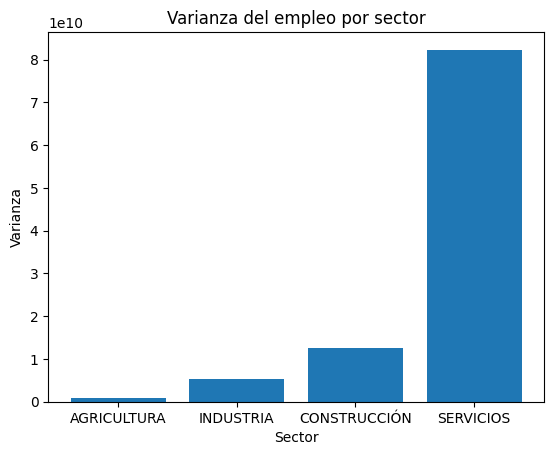

In [201]:
import matplotlib.pyplot as plt
variance = df_12.var()

# Crear un gráfico de barras que muestra la varianza de los valores de empleo en cada sector
plt.bar(variance.index, variance.values)
plt.xlabel('Sector')
plt.ylabel('Varianza')
plt.title('Varianza del empleo por sector')
plt.show()

Salario medio anual por grupos de ocupación, periodo y sexo

In [ ]:
df_13.head()

,"K Trabajadores cualificados de la construcción, excepto operadores de máquinas",N Conductores y operadores de maquinaria móvil,B Técnicos y profesionales científicos e intelectuales de la salud y la enseñanza,I Trabajadores de los servicios de protección y seguridad,A Directores y gerentes,E Empleados de oficina que no atienden al público,"P Peones de la agricultura, pesca, construcción, industrias manufactureras y transportes",D Técnicos; profesionales de apoyo,C Otros técnicos y profesionales científicos e intelectuales,G Trabajadores de los servicios de restauración y comercio,F Empleados de oficina que atienden al público,H Trabajadores de los servicios de salud y el cuidado de personas,"M Operadores de instalaciones y maquinaria fijas, y montadores","L Trabajadores cualificados de las industrias manufactureras, excepto operadores de instalaciones y máquinas",O Trabajadores no cualificados en servicios (excepto transportes),"J Trabajadores cualificados en el sector agrícola, ganadero, forestal y pesquero"
año,,,,,,,,,,,,,,,,
2020-01-01,21265.6,21182.1,37664.4,31425.5,61698.2,26465.1,19279.7,32611.2,41735.7,18248.1,22442.0,21281.8,27884.5,24104.1,17159.2,22334.7
2019-01-01,21070.1,20920.0,35488.0,29339.1,60780.8,25634.1,18920.6,31816.3,40333.7,18154.8,22437.5,21005.6,27672.3,24405.8,17346.8,22112.5
2018-01-01,20928.8,21487.5,33434.0,29087.5,58850.2,27420.3,19076.6,31979.9,41408.1,17962.5,22149.7,20198.0,27490.5,24564.8,16479.0,19899.2
2017-01-01,20303.3,20452.2,34790.1,28803.0,55478.0,25169.4,17518.8,31891.6,39229.3,16825.9,22049.9,18343.6,25930.9,24122.8,16268.2,19743.0
2016-01-01,20191.7,20161.1,34293.4,28589.6,54142.7,24711.9,16754.3,31206.2,40077.0,16260.7,21272.7,18877.8,25396.0,23476.7,16028.1,18996.6


In [ ]:
# Media entre los salarios medios de los hombre y de mujeres
df_13_mean = df_13.groupby(level=0).mean()
df_13_mean.head()

,"K Trabajadores cualificados de la construcción, excepto operadores de máquinas",N Conductores y operadores de maquinaria móvil,B Técnicos y profesionales científicos e intelectuales de la salud y la enseñanza,I Trabajadores de los servicios de protección y seguridad,A Directores y gerentes,E Empleados de oficina que no atienden al público,"P Peones de la agricultura, pesca, construcción, industrias manufactureras y transportes",D Técnicos; profesionales de apoyo,C Otros técnicos y profesionales científicos e intelectuales,G Trabajadores de los servicios de restauración y comercio,F Empleados de oficina que atienden al público,H Trabajadores de los servicios de salud y el cuidado de personas,"M Operadores de instalaciones y maquinaria fijas, y montadores","L Trabajadores cualificados de las industrias manufactureras, excepto operadores de instalaciones y máquinas",O Trabajadores no cualificados en servicios (excepto transportes),"J Trabajadores cualificados en el sector agrícola, ganadero, forestal y pesquero"
año,,,,,,,,,,,,,,,,
2009-01-01,17972.45,17992.15,30962.05,24575.40,55205.90,21832.30,14405.95,28250.00,35456.65,15159.20,18387.45,16567.15,18864.60,18344.25,14683.10,19607.00
2010-01-01,18710.45,18246.45,32008.70,24478.90,54452.60,21975.50,15110.70,27458.90,34936.80,15266.10,18793.95,17015.70,19756.80,19588.20,13784.65,17947.80
2011-01-01,18921.45,18690.60,30944.75,24882.70,52565.25,22233.25,15167.00,27669.35,33905.75,14996.00,18923.95,17029.30,20108.85,19561.20,14011.00,17284.95
2012-01-01,19124.65,18925.05,30481.95,24108.40,51648.05,21789.00,15199.95,27851.15,34544.05,14906.10,18752.45,16314.00,20163.40,19265.85,14019.65,17672.00
2013-01-01,19004.30,18455.45,30793.55,23761.85,50061.70,21547.75,15054.15,27993.75,35434.55,15079.25,18845.05,16395.05,20828.20,19179.10,13744.25,18220.70


Contaminacion de CO2 por vuelos comerciales

In [ ]:
df_17.head()

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2014,2014,7.509847e+06,NaN,NaN
1,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2015,2015,7.351698e+06,NaN,NaN
2,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2016,2016,7.415273e+06,NaN,NaN
3,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2017,2017,7.333902e+06,NaN,NaN
4,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2018,2018,7.320473e+06,NaN,NaN


In [ ]:
# co_spain = df_17.loc[df_17['Country'] == 'Spain']
#falta filtrar por passenger flight
# co_spain

Concentracion de CO2 en la atmosfera

In [ ]:
df_21.head()

,Periodo,CO2,Var %,Subida,Bajada
Año,,,,,
1991-01-01,Noviembre,354.95,NaN,False,False
1991-01-01,Diciembre,356.42,0.414143,True,False
1992-01-01,Enero,356.73,0.086976,True,False
1992-01-01,Febrero,356.89,0.044852,True,False
1992-01-01,Marzo,357.68,0.221357,True,False


In [ ]:
#volver a calcular esto
# df_21['Var %'] = df_21['CO2'].pct_change() * 100

# # Marcar los períodos de subida y bajada
# df_21['Subida'] = df_21['Var %'] > 0
# df_21['Bajada'] = df_21['Var %'] < 0

# # Mostrar los períodos de subida y bajada
# print('Períodos de subida:')
# print(df_21[df_21['Subida']])

# print('\nPeríodos de bajada:')
# print(df_21[df_21['Bajada']])